# Veriye ilk bakış

# veri setinin hikayesi nedir ?
* veri genelde önümüze hazır gelmez, birden fazla tabloyu bir araya getirerek ortaya çıkarırız
* Oluşturulma hikayesnin nasıl olduğunu sorgulamak lazım, detaylar da önemli
* veri setini anlamalıyız.
* veri seti nasıl toplanmıştır sorusu sorulmalı.

## veri setinin hikaye ve yapısının incelenmesi

In [2]:
import seaborn as sns
planets= sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
df = planets.copy() # orjinalini korumayı tercih etmek iyi oluyormuş.

In [4]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [7]:
#veri setinin yapısal bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [10]:
## sadece değişkenler ve yapıları ile bilgiye:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [11]:
## object tipi, "kategorik" tip anlamına geliyor ancak object
# tipini categorical tipine dönüştürebiliyoruz
# gelişmiş fonksiyonlar objectin categorical olduğunu anlayabiliyor ancak
# tavsiye edilen aksiyon object tiplerini categorical'a çevirmek.
# Veri = Kategorik+ Sayısal
# Kategorik = Nominal(Kadın-Erkek) + Ordinal(Araba markası, Rütbe)
#Sayısal = Interval(Aralık)+Ratio(Oran)
import pandas as pd
df.method= pd.Categorical(df.method)

In [ ]:
df.head()

## Veri Setinin Betimlenmesi

In [2]:
import seaborn as sns
planets = sns.load_dataset('planets')
df=planets.copy()

In [7]:
df.shape # değişken ve gözlem sayısı

(1035, 6)

In [8]:
df.columns # değişkenlerin adı

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [9]:
df.describe().T # betimsel istatistikleri (categoric değişkenleri dışarda bırakır.)

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [11]:
df.describe(include='all').T #pek mantıklı oladı böyle

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035.0,NaN,NaN,NaN,1.785507,1.240976,1.0,1.0,1.0,2.0,7.0
orbital_period,992.0,NaN,NaN,NaN,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,NaN,NaN,NaN,2.638161,3.818617,0.0036,0.229,1.26,3.04,25.0
distance,808.0,NaN,NaN,NaN,264.069282,733.116493,1.35,32.56,55.25,178.5,8500.0
year,1035.0,NaN,NaN,NaN,2009.070531,3.972567,1989.0,2007.0,2010.0,2012.0,2014.0


## Eksik değerlerin incelenmesi
* şu anda sadece çok temel ele alacağız, daha sonra çok daha detaylı inceleyeceğiz.

In [21]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
df.isnull().values.any() ##hiç eksik gözlem var mı

True

In [24]:
#hiç eksik gözlem var mı ?
df.isnull().values.any() #  True yani hiç null var mı

True

In [19]:
##hangi değşkende kaçar tane var
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [26]:
## NAN değelerine 0 değeri basılabilir df['degisken_isim'].fillna(0, inplace=True)

In [27]:
## NAN değelerine ortalama değeri de basılabilir df['degisken_isim'].fillna(df.orbital_period.mean(), inplace=True)

In [28]:
## df.fillna(df.mean()inplace=True) bu şekilde tüm NAN ları ortalama ile doldurabiliriz

## Kategori Değişken Özetleri

df = planets.copy()# Sadece Kategorik değişkenler ve Özetleri

### Veri = Kategorik + Sayısal
### Kategorik = Nominal(Kadın-Erkek) + Ordinal(Araba markası, Rütbe)
### Sayısal = Interval(Aralık)+Ratio(Oran)

In [46]:
df = planets.copy()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [4]:
kat_df= df.select_dtypes(include=['object']) # tipi object olan değişkeni seçtik

## Kategorik değişkenin Sınıflarınıa ve Sınıf Sayısına Erişmek

In [49]:
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [51]:
kat_df['method'].value_counts().count() ## 10 farklı varmış

10

## Kategorik değişkenin Sınıflarının Frekanslarına Erişmek

In [53]:
kat_df['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

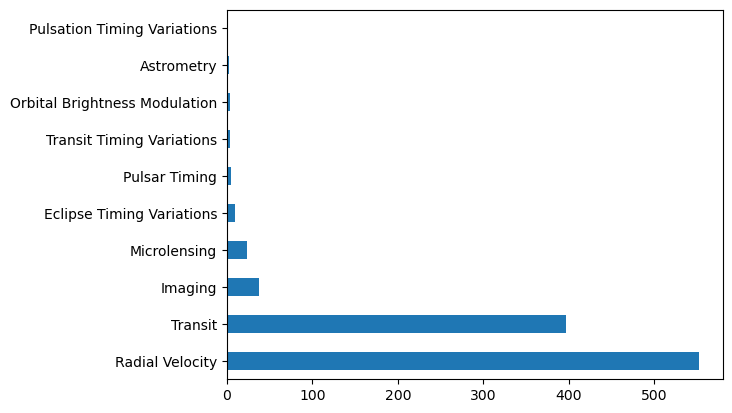

In [9]:
kat_df['method'].value_counts().plot.barh();

## Sürekli değişken Özetlerine Erişmek

In [61]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [62]:
df_num=df.select_dtypes(include= ['float64','int64'])

In [63]:
df_num

,number,orbital_period,mass,distance,year
0,1,269.300000,7.10,77.40,2006
1,1,874.774000,2.21,56.95,2008
2,1,763.000000,2.60,19.84,2011
3,1,326.030000,19.40,110.62,2007
4,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...
1030,1,3.941507,NaN,172.00,2006
1031,1,2.615864,NaN,148.00,2007
1032,1,3.191524,NaN,174.00,2007
1033,1,4.125083,NaN,293.00,2008


In [64]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [66]:
df_num['distance'].describe().T

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [67]:
print('Ortalama: '+ str(df_num['distance'].mean()))
print('Dolu Gözlem Sayısı : '+ str(df_num['distance'].count()))
print('Maksimum Değer : '+ str(df_num['distance'].max()))
print('Minumum Değer: '+ str(df_num['distance'].min()))
print('Medyan: '+ str(df_num['distance'].median()))
print('Standart Sapma: '+ str(df_num['distance'].std()))


Ortalama: 264.06928217821786
Dolu Gözlem Sayısı : 808
Maksimum Değer : 8500.0
Minumum Değer: 1.35
Medyan: 55.25
Standart Sapma: 733.1164929404422


# Stün Grafik (Bar Plot)

### Dağılım Grafikleri
* Barplot : kategorik değişkenleri stün grafikleri ile görmemizi sağlar. ! 

#### Veri setnin hikayesi
* price : dolar cindsinden fiyat (326,18,823)
* carat: ağırlık (0.2-5.01)
* cut:  kalite (Fair,Good,Very Good,Premium, Ideal)
* color: renk (From j()worst to D(best))
* clarity: temizliği, berraklığı (I1(worst), SI2,SI1,VS2,VVS2,VVS1,IF(best))
* x: length in mm (0-10.74)
* y: width in mm(0-58.9)
* z: depth in mm (0.31.8)
* depth : toplam derinlik yüzdesi= (z/mean(x,y) = 2*z / (x+y))  43-79
* table = elmasın en geniş noktasına göre genişliği (43-95)

In [6]:
import seaborn as sns
diamond = sns.load_dataset('diamonds')
df = diamond.copy()

In [7]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [10]:
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

kategorik değişkenlerle ilgili

In [11]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [12]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [13]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [14]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

#### Bu kategorik ölçek türleri Ordinal yani rütbeleri varmış gibi

## Ordinal tanımlama

In [15]:
from pandas.api.types import CategoricalDtype

In [16]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [17]:
df.cut= df.cut.astype(CategoricalDtype(ordered= True))
## ordinal ve ketegorik bir değişken olduğunu ifade ettik
#dahası içinde ki valueları önemliden önemsize sıralamasını
#söyledik, 
#fonksiyon bunu kendisi uygun gördüğü şekilde yapıyor.
#O yüzden kontrol etmek gerekir.

In [18]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [19]:
df.cut.head(1) # sralama yanlış, düzenlemek gerekiyor.

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [20]:
cut_kategoriler = ['Fair','Good','Very Good','Premium','Ideal']

In [21]:
df.cut= df.cut.astype(CategoricalDtype(
                                    categories=cut_kategoriler,
                                       ordered= True))

In [22]:
df.cut.head(1) ## şimdi sıralama doğru oldu

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

önemli olan
* detayları düzenlemek,
* veri setinin hikayesini bilmek,
* hazırlayabilmek için düşünmek

In [23]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [24]:
df.color= df.color.astype(CategoricalDtype(ordered= True))

In [25]:
df.color.head

<bound method NDFrame.head of 0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53940, dtype: category
Categories (7, object): ['D' < 'E' < 'F' < 'G' < 'H' < 'I' < 'J']>

In [26]:
color_quality = ['D' ,'E' , 'F' , 'G' , 'H' , 'I' , 'J']
color_quality.reverse()

In [27]:
color_quality

['J', 'I', 'H', 'G', 'F', 'E', 'D']

In [28]:
df.color= df.color.astype(CategoricalDtype( categories= color_quality ,ordered= True ))

In [29]:
df.color.head(1)

0    E
Name: color, dtype: category
Categories (7, object): ['J' < 'I' < 'H' < 'G' < 'F' < 'E' < 'D']

In [30]:
df.clarity.values

['SI2', 'SI1', 'VS1', 'VS2', 'SI2', ..., 'SI1', 'SI1', 'SI1', 'SI2', 'SI2']
Length: 53940
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [31]:
df.clarity= df.clarity.astype(CategoricalDtype(ordered= True ))

In [32]:
df.clarity.head(1)

0    SI2
Name: clarity, dtype: category
Categories (8, object): ['IF' < 'VVS1' < 'VVS2' < 'VS1' < 'VS2' < 'SI1' < 'SI2' < 'I1']

In [33]:
#(I1(worst), SI2,SI1,VS2,VVS2,VVS1,IF(best))
clarity_quality = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
clarity_quality = clarity_quality.reverse()

In [34]:
df.clarity= df.clarity.astype(CategoricalDtype( categories= clarity_quality ,ordered= True ))

In [35]:
df.clarity.head(1)

0    SI2
Name: clarity, dtype: category
Categories (8, object): ['IF' < 'VVS1' < 'VVS2' < 'VS1' < 'VS2' < 'SI1' < 'SI2' < 'I1']

# Stün Grafiğin Oluşturması

### barplot

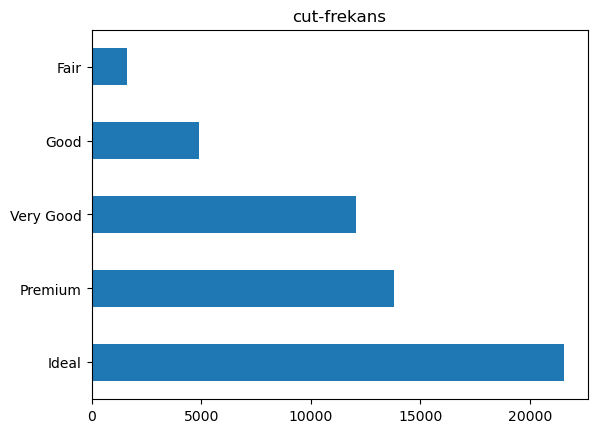

In [36]:
df['cut'].value_counts().plot.barh().set_title('cut-frekans');

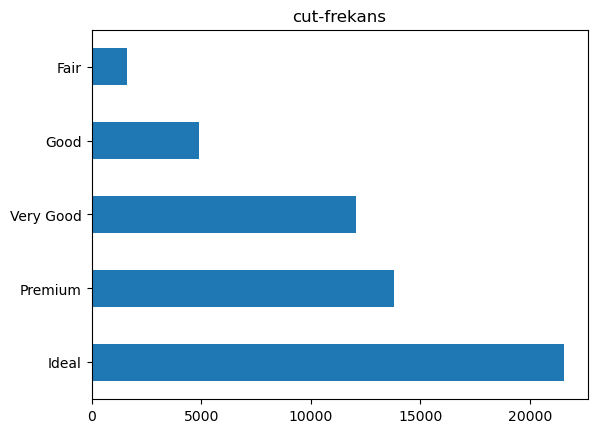

In [37]:
(df['cut']
 .value_counts().
 plot.barh().
 set_title('cut-frekans'));   # böyle de yazarız daha cool

<Axes: xlabel='cut'>

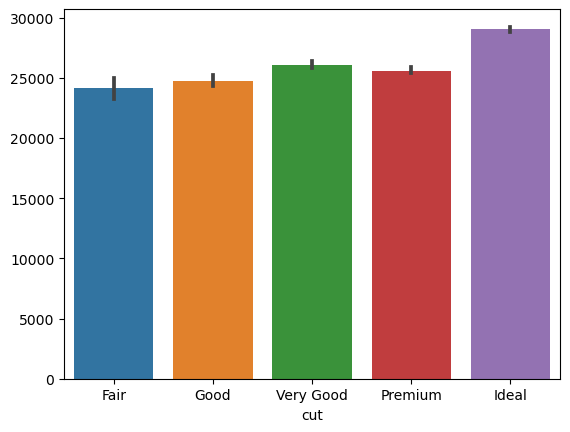

In [41]:
sns.barplot(x = 'cut',
            y= df.cut.index, 
            data= df)

In [42]:
df.cut.index

RangeIndex(start=0, stop=53940, step=1)

## Stün Grafik Çaprazlamalar

In [182]:
cut_kategoriler = ['Fair','Good','Very Good','Premium','Ideal']
df.cut= df.cut.astype(CategoricalDtype(
                                    categories=cut_kategoriler,
                                       ordered= True))
df.clarity.head(1)

0    SI2
Name: clarity, dtype: category
Categories (8, object): ['IF' < 'VVS1' < 'VVS2' < 'VS1' < 'VS2' < 'SI1' < 'SI2' < 'I1']

In [183]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Cut ile Price arasında bir bağıntı kurarak grafik çizeceğiz

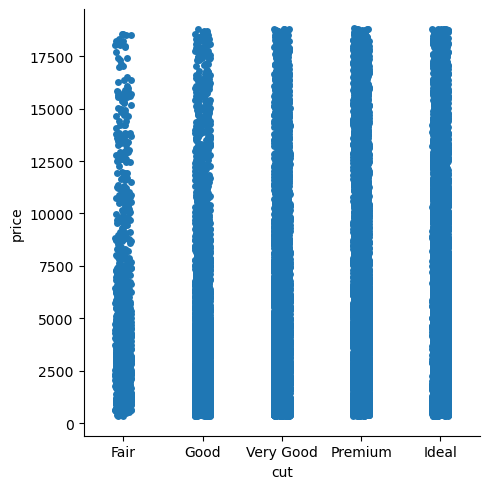

In [184]:
sns.catplot(x = 'cut', y='price', data=df );

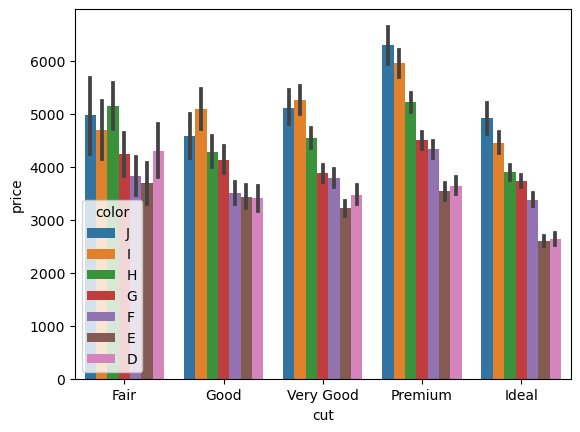

In [187]:
sns.barplot(x= 'cut', y='price', hue='color', data=df);

In [195]:
df.groupby(['cut','color'])['price'].mean()  ##doğrulama

cut        color
Fair       J        4975.655462
           I        4685.445714
           H        5135.683168
           G        4239.254777
           F        3827.003205
           E        3682.312500
           D        4291.061350
Good       J        4574.172638
           I        5078.532567
           H        4276.254986
           G        4123.482204
           F        3495.750275
           E        3423.644159
           D        3405.382175
Very Good  J        5103.513274
           I        5255.879568
           H        4535.390351
           G        3872.753806
           F        3778.820240
           E        3214.652083
           D        3470.467284
Premium    J        6294.591584
           I        5946.180672
           H        5216.706780
           G        4500.742134
           F        4324.890176
           E        3538.914420
           D        3631.292576
Ideal      J        4918.186384
           I        4451.970377
           H        388

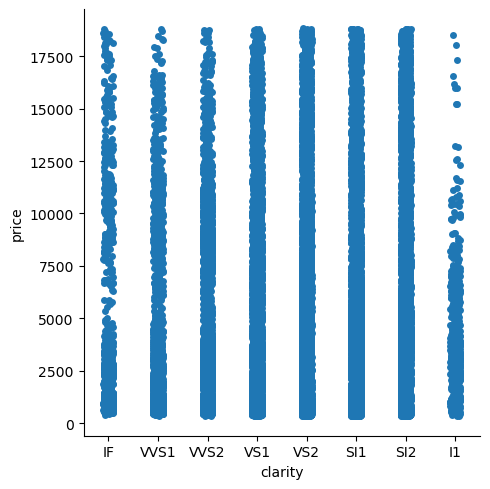

In [185]:
sns.catplot(x = 'clarity', y='price', data=df );

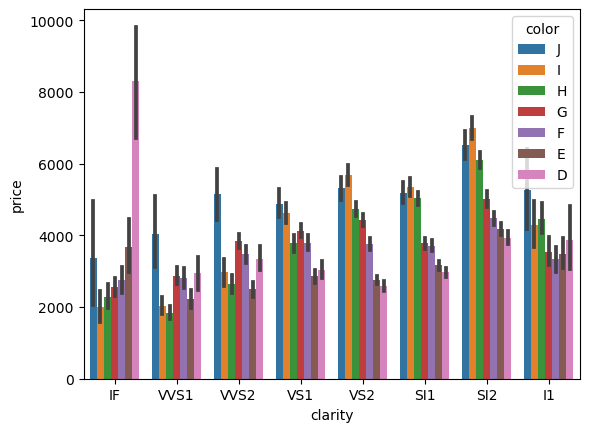

In [188]:
sns.barplot(x= 'clarity', y='price', hue='color', data=df);

In [48]:
df.groupby(['color','clarity'])['price'].mean()

color  clarity
D      IF         8307.369863
       VVS1       2947.912698
       VVS2       3351.128391
       VS1        3030.158865
       VS2        2587.225692
       SI1        2976.146423
       SI2        3931.101460
       I1         3863.023810
E      IF         3668.506329
       VVS1       2219.820122
       VVS2       2499.674067
       VS1        2856.294301
       VS2        2750.941700
       SI1        3161.838005
       SI2        4173.826036
       I1         3488.421569
F      IF         2750.836364
       VVS1       2804.276567
       VVS2       3475.512821
       VS1        3796.717742
       VS2        3756.795093
       SI1        3714.225716
       SI2        4472.625233
       I1         3342.181818
G      IF         2558.033774
       VVS1       2866.820821
       VVS2       3845.283437
       VS1        4131.362197
       VS2        4416.256498
       SI1        3774.787449
       SI2        5021.684109
       I1         3545.693333
H      IF         2287.86

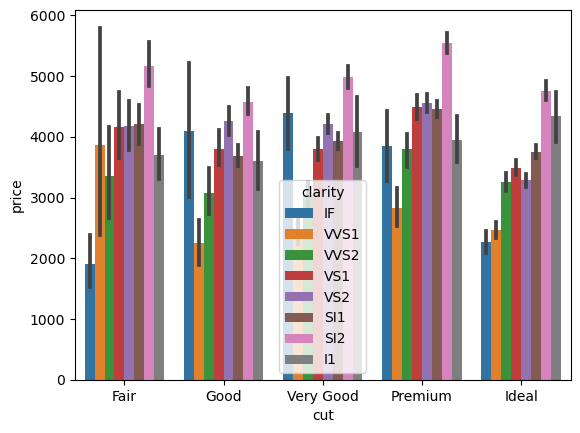

In [189]:
sns.barplot(x= 'cut', y='price', hue='clarity', data=df);

cut        color
Fair       J        4975.655462
           I        4685.445714
           H        5135.683168
           G        4239.254777
           F        3827.003205
           E        3682.312500
           D        4291.061350
Good       J        4574.172638
           I        5078.532567
           H        4276.254986
           G        4123.482204
           F        3495.750275
           E        3423.644159
           D        3405.382175
Very Good  J        5103.513274
           I        5255.879568
           H        4535.390351
           G        3872.753806
           F        3778.820240
           E        3214.652083
           D        3470.467284
Premium    J        6294.591584
           I        5946.180672
           H        5216.706780
           G        4500.742134
           F        4324.890176
           E        3538.914420
           D        3631.292576
Ideal      J        4918.186384
           I        4451.970377
           H        388

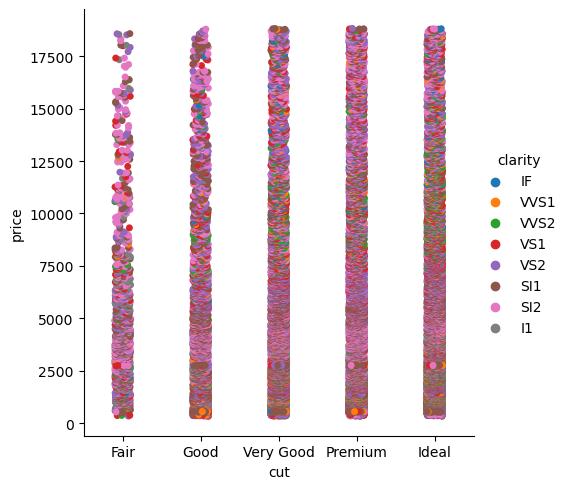

In [43]:
sns.catplot(x= 'cut', y='price', hue='clarity', data=df);